In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [31]:
data = pd.read_csv('../data/cleaned_data.csv')

In [32]:
data

,Unnamed: 0,index,1,2,3,4,tot_win,tot_los,Subj,Study,Unique_ID,balance,Payoff
0,0,Subj_1,12,9,3,71,5800,-4650,1,Fridberg,1,1150,1
1,1,Subj_2,24,26,12,33,7250,-7925,2,Fridberg,2,-675,1
2,2,Subj_3,12,35,10,38,7100,-7850,3,Fridberg,3,-750,1
3,3,Subj_4,11,34,12,38,7000,-7525,4,Fridberg,4,-525,1
4,4,Subj_5,10,24,15,46,6450,-6350,5,Fridberg,5,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,93,Subj_94,24,69,13,44,12150,-11850,94,Wetzels,613,300,2
613,94,Subj_95,5,31,46,68,9300,-7150,95,Wetzels,614,2150,2
614,95,Subj_96,18,19,37,76,9350,-7900,96,Wetzels,615,1450,2
615,96,Subj_97,25,30,44,51,10250,-9050,97,Wetzels,616,1200,2


In [33]:
Fridberg = data[data['Study']=='Fridberg']
Horstmann = data[data['Study']=='Horstmann']
Kjome = data[data['Study']=='Kjome']
Maia = data[data['Study']=='Maia']
SteingroverInPrep = data[data['Study']=='SteingroverInPrep']
Premkumar = data[data['Study']=='Premkumar']
Wood = data[data['Study']=='Wood']
Worthy = data[data['Study']=='Worthy']
Steingroever2011 = data[data['Study']=='Steingroever2011']
Wetzels = data[data['Study']=='Wetzels']

l = [Fridberg, Horstmann, Kjome, Maia, SteingroverInPrep, Premkumar, Wood, Worthy, Steingroever2011, Wetzels]

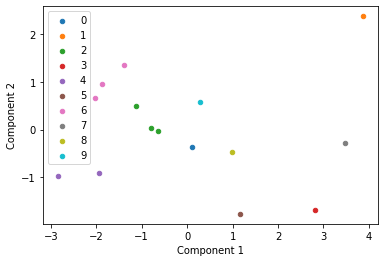

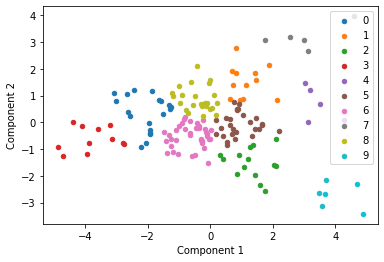

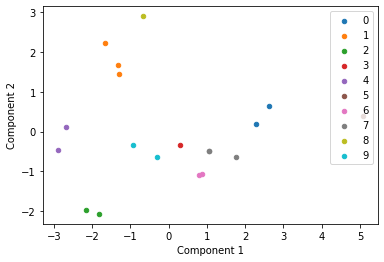

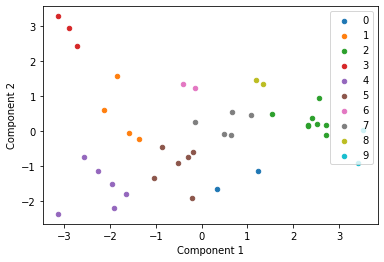

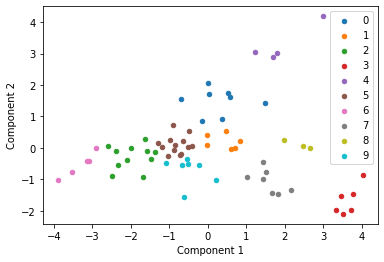

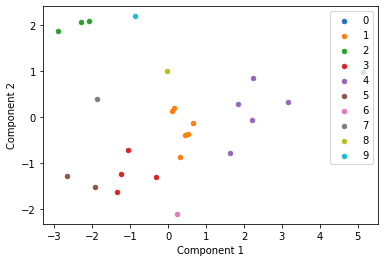

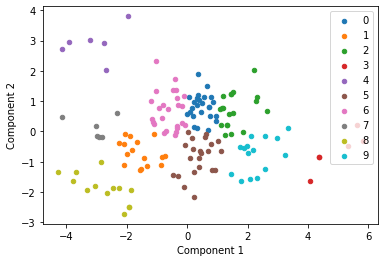

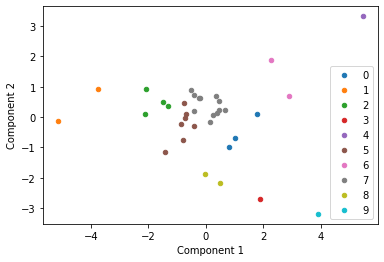

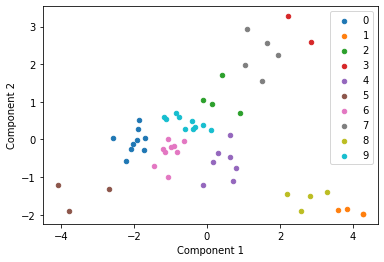

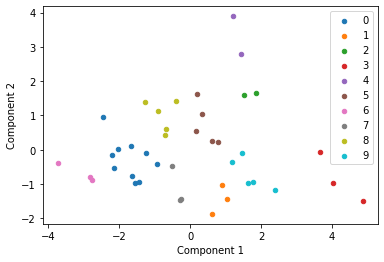

In [47]:
for s in l:
    df = s.drop(columns=['index', 'Subj', 'Study', 'Unnamed: 0', 'Unique_ID', 'balance'])

    scaler = preprocessing.StandardScaler().fit(df)
    X_scaled = scaler.transform(df)

    #rename columns to clearly represent decks
    sd = pd.DataFrame(X_scaled, columns=['Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'tot_win', 'tot_los', 'Payoff'])
    sd

    pca = PCA(2)
    df = pca.fit_transform(sd)

    #w_out = pd.DataFrame(df, columns=['Component_1', 'Component_2'])
    w_out_payoff = sd.drop(columns=["Payoff"])

    w_out = pca.fit_transform(w_out_payoff)

    kmeans = KMeans(n_clusters= 10)
 
    #predict the labels of clusters.
    label = kmeans.fit_predict(w_out)
 
    #Getting unique labels
    u_labels = np.unique(label)
 
    #plotting the results:
    for i in u_labels:
        plt.scatter(w_out[label == i , 0] , w_out[label == i , 1] , label = i, s=20)
    plt.legend()
    #plt.title()
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

In [8]:
# create instance of labelencoder
labelencoder = LabelEncoder()
# Assign numerical values and store in a new column
clean_data['Study_no'] = labelencoder.fit_transform(clean_data['Study'])

# create instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing on Study_no column values
enc_df = pd.DataFrame(enc.fit_transform(clean_data[['Study_no']]).toarray())

# rename columns as Study names
enc_df = enc_df.rename(columns={0: 'Fridberg', 1: 'Horstmann', 2: 'Kjome', 3: 'Maia', 6: 'SteingroverInPrep', 4: 'Premkumar', 8: 'Wood', 9: 'Worthy', 5: 'Steingroever2011', 7: 'Wetzels'})

# reset index before concatenation
clean_data.reset_index(inplace=True)
enc = pd.concat([clean_data, enc_df], axis=1)
enc

df = enc.drop(columns=['level_0', 'index', 'Subj', 'Study', 'Study_no', 'Unnamed: 0', "Unique_ID", "balance"])

scaler = preprocessing.StandardScaler().fit(df)
X_scaled = scaler.transform(df)

#rename columns to clearly represent decks
sd = pd.DataFrame(X_scaled, columns=['Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'tot_win', 'tot_los', 'Payoff', 'Fridberg', 'Horstmann', 'Kjome', 'Maia', 'Premkumar', 'Steingroever2011', 'SteingroverInPrep', 'Wetzels', 'Wood', 'Worthy'])
sd

pca = PCA(2)

df = pca.fit_transform(sd)

#w_out = pd.DataFrame(df, columns=['Component_1', 'Component_2'])
w_out_payoff = sd.drop(columns=["Payoff"])
w_out_payoff

pca = PCA(2)

w_out = pca.fit_transform(w_out_payoff)

kmeans = KMeans(n_clusters= 10)
 
#predict the labels of clusters.
label = kmeans.fit_predict(w_out)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(w_out[label == i , 0] , w_out[label == i , 1] , label = i, s=20)
plt.legend()
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

,Unnamed: 0,index,1,2,3,4,tot_win,tot_los,Subj,Study,Unique_ID,balance,Payoff
519,0,Subj_1,46,37,29,38,11650,-12200,1,Steingroever2011,520,-550,2
520,1,Subj_2,40,57,19,34,12350,-13950,2,Steingroever2011,521,-1600,2
521,2,Subj_3,19,35,8,88,10200,-9300,3,Steingroever2011,522,900,2
522,3,Subj_4,18,11,10,111,8950,-6750,4,Steingroever2011,523,2200,2
523,4,Subj_5,13,1,1,135,8200,-6300,5,Steingroever2011,524,1900,2
524,5,Subj_6,48,46,21,35,12200,-13700,6,Steingroever2011,525,-1500,2
525,6,Subj_7,9,47,42,52,10300,-9850,7,Steingroever2011,526,450,2
526,7,Subj_8,0,0,150,0,7500,-3750,8,Steingroever2011,527,3750,2
527,8,Subj_9,21,64,35,30,11750,-11800,9,Steingroever2011,528,-50,2
528,9,Subj_10,9,4,127,10,8150,-5600,10,Steingroever2011,529,2550,2
